# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
lat_lngs = []

cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Empty list
city_data = []

print("Beginning Data Retrieval")
print("-----------------------------")

# Counters
record_count = 1
set_count = 1

# Loop through all the cities 
for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Endpoint URL 
    city_url = f"{url}q={city}&appid={weather_api_key}"

    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    
    record_count += 1

    
    try:
        
        city_weather = requests.get(city_url).json()

        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # Skip the city
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | lihue
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | gunnison
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | vadso
Processing Record 15 of Set 1 | oulad teima
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | chui
Processing Record 19 of Set 1 | noshiro
Processing Record 20 of Set 1 | espargos
City not found. Skipping...
Processing Record 21 of Set 1 | verdal
Processing Record 22 of Set 1 | k

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

record_count_series = city_data_df.count()
print(record_count_series)



City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64


In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lihue,21.9789,-159.3672,305.73,63,75,9.77,US,1691617481
1,ilulissat,69.2167,-51.1000,285.16,43,75,1.54,GL,1691617490
2,mount gambier,-37.8333,140.7667,283.32,71,100,4.34,AU,1691617458
3,ushuaia,-54.8000,-68.3000,280.96,53,40,6.69,AR,1691617435
4,port-aux-francais,-49.3500,70.2167,275.82,78,94,12.52,TF,1691617430


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,305.73,63,75,9.77,US,1691617481
1,ilulissat,69.2167,-51.1000,285.16,43,75,1.54,GL,1691617490
2,mount gambier,-37.8333,140.7667,283.32,71,100,4.34,AU,1691617458
3,ushuaia,-54.8000,-68.3000,280.96,53,40,6.69,AR,1691617435
4,port-aux-francais,-49.3500,70.2167,275.82,78,94,12.52,TF,1691617430


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

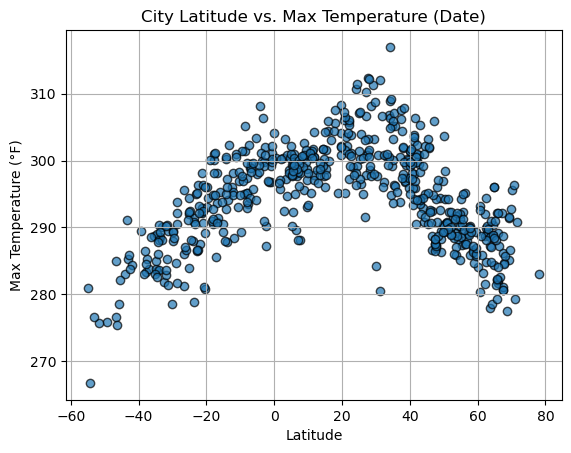

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.7)

plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save 
plt.savefig("../output_data/Fig1.png")

# Plot
plt.show()


#### Latitude Vs. Humidity

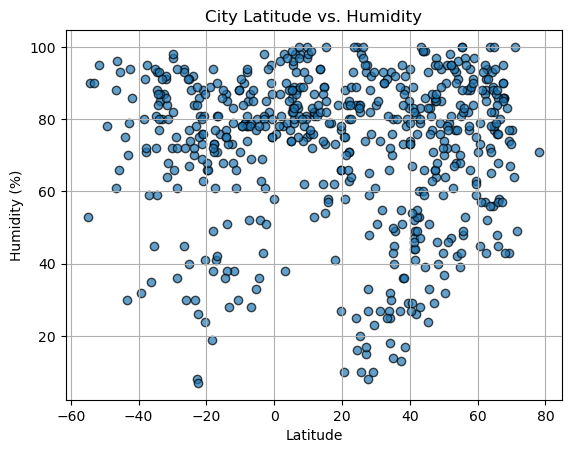

In [17]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

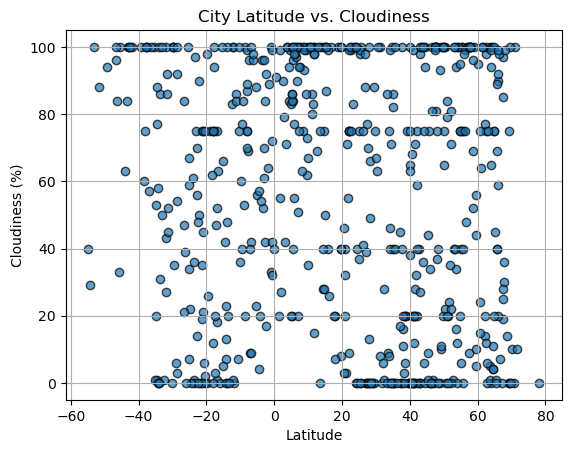

In [18]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

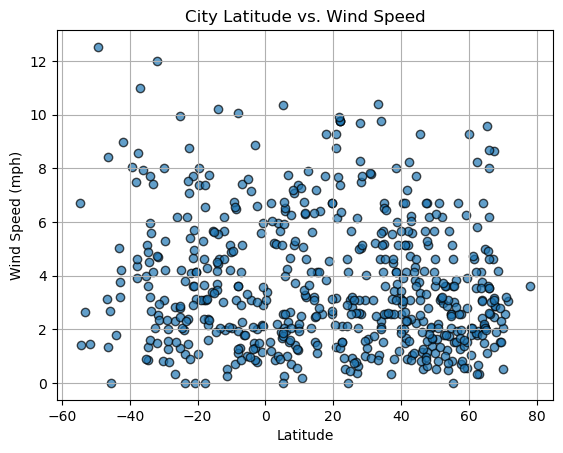

In [19]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, hemisphere, y_label):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_line, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(f'{hemisphere} Hemisphere: {y_label} vs. Latitude')
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}", (min(x_values), min(y_values)), fontsize=12, color='red')



In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,305.73,63,75,9.77,US,1691617481
1,ilulissat,69.2167,-51.1000,285.16,43,75,1.54,GL,1691617490
6,anadyr,64.7500,177.4833,284.43,82,75,5.00,RU,1691617480
8,albany,42.6001,-73.9662,300.86,53,40,4.74,US,1691617474
10,isafjordur,66.0755,-23.1240,281.76,68,90,3.54,IS,1691617384


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mount gambier,-37.8333,140.7667,283.32,71,100,4.34,AU,1691617458
3,ushuaia,-54.8000,-68.3000,280.96,53,40,6.69,AR,1691617435
4,port-aux-francais,-49.3500,70.2167,275.82,78,94,12.52,TF,1691617430
5,uturoa,-16.7333,-151.4333,298.20,71,18,7.74,PF,1691617623
7,grytviken,-54.2811,-36.5092,266.74,90,29,1.41,GS,1691617475


###  Temperature vs. Latitude Linear Regression Plot

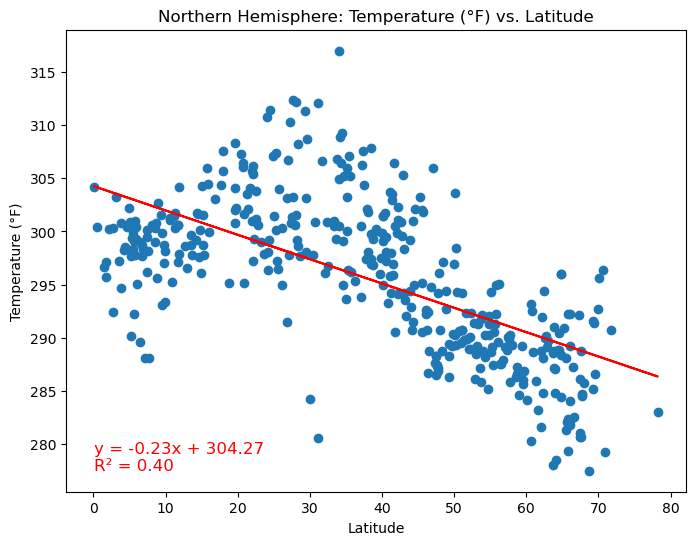

In [25]:
# Linear regression on Northern Hemisphere: Temperature vs. Latitude
plt.figure(figsize=(8, 6))
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Northern', 'Temperature (°F)')

plt.savefig("../output_data/Northern_Hemi_Temp_Lat.png")

plt.show()


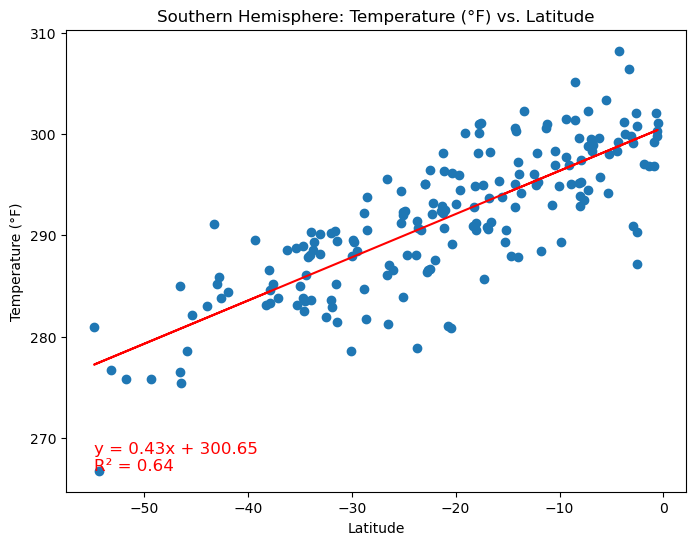

In [26]:
# Linear regression on Southern Hemisphere: Temperature vs. Latitude
plt.figure(figsize=(8, 6))
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Southern', 'Temperature (°F)')

plt.savefig("../output_data/Southern_Hemi_Temp_Lat.png")

plt.show()


**Discussion about the linear relationship:** 
Temperature vs. Latitude:
Temperature decreases as we move away from the equator towards the poles. This is shown by the downward sloping linear regression lines, indicating a strong correlation between latitude and temperature.

Humidity vs. Latitude:
There is no clear trend of humidity changing with latitude. The scatter plots are scattered, and the weak linear regression lines suggest that latitude doesn't strongly predict humidity.

Cloudiness vs. Latitude:
Cloudiness doesn't seem to be significantly influenced by latitude. The scattered points and low R squared values indicate that latitude isn't a primary factor in determining cloud cover.

Wind Speed vs. Latitude:
Wind speed slightly increases as we move away from the equator, but the relationship is not strong. The scatter plots are spread out, and latitude alone doesn't explain wind speed variations well.

In summary, while temperature has a clear correlation with latitude, the other variables show weaker or no direct relationship with latitude alone. Other factors play a more substantial role in determining these weather variables.

### Humidity vs. Latitude Linear Regression Plot

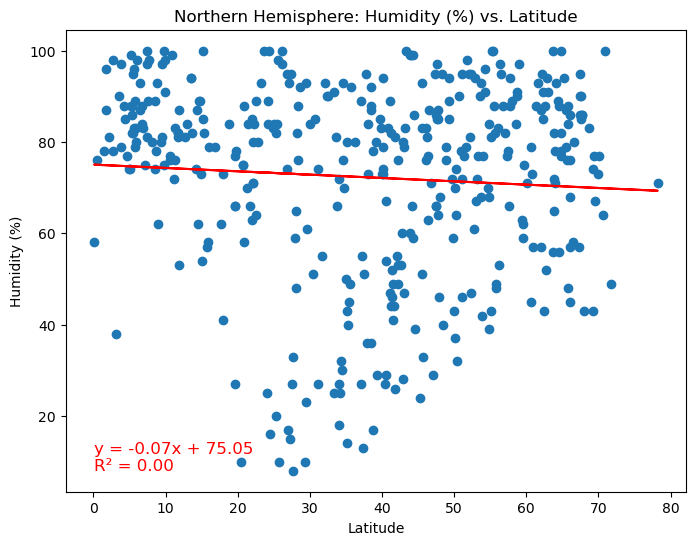

In [28]:
plt.figure(figsize=(8, 6))
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Northern', 'Humidity (%)')

plt.savefig("../output_data/Northern_Hemi_Humidity_Lat.png")

plt.show()


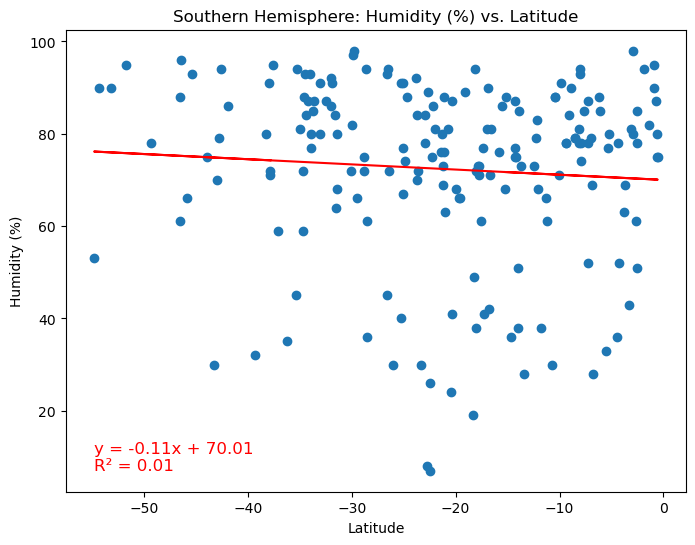

In [30]:
plt.figure(figsize=(8, 6))
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Southern', 'Humidity (%)')

plt.savefig("../output_data/Southern_Hemi_Humidity_Lat.png")

plt.show()


**Discussion about the linear relationship:**Humidity vs. Latitude:
The scatter plots and linear regression analysis indicate that humidity doesn't significantly change with latitude. In both the Northern and Southern Hemispheres, humidity levels appear to be influenced by factors beyond latitude, such as local geography and weather patterns. The low R-squared values reinforce that latitude alone doesn't explain much of the variation in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

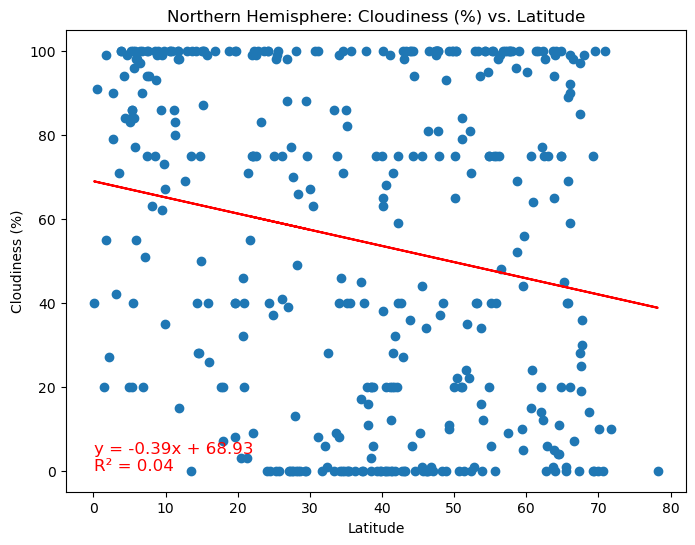

In [35]:
plt.figure(figsize=(8, 6))
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Northern', 'Cloudiness (%)')

plt.savefig("../output_data/Northern_Hemi_Cloudiness_Lat.png")

plt.show()


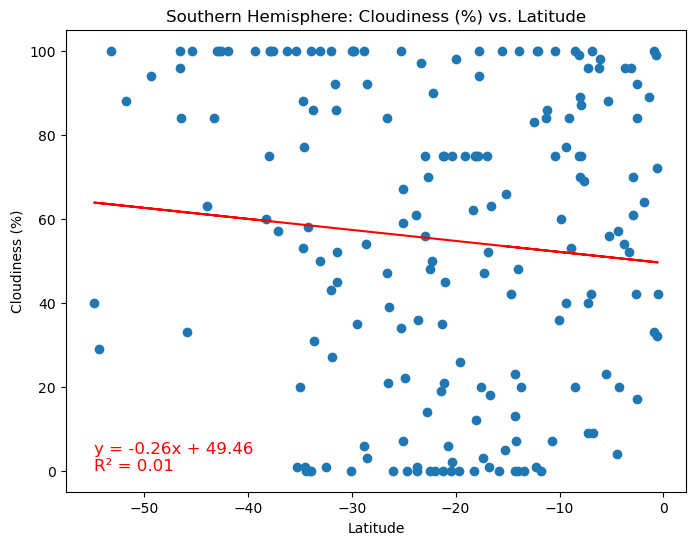

In [37]:
plt.figure(figsize=(8, 6))
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Southern', 'Cloudiness (%)')

plt.savefig("../output_data/Southern_Hemi_Cloudiness_Lat.png")

plt.show()


**Discussion about the linear relationship:** Cloudiness vs. Latitude:
The scatter plots and linear regression analysis show that cloudiness doesn't have a consistent pattern with latitude. Both in the Northern and Southern Hemispheres, cloudiness levels vary widely at different latitudes. The weak linear relationship and low R-squared values suggest that latitude alone isn't a reliable indicator of cloudiness. Local weather conditions and atmospheric factors have a more significant impact on cloud cover.


### Wind Speed vs. Latitude Linear Regression Plot

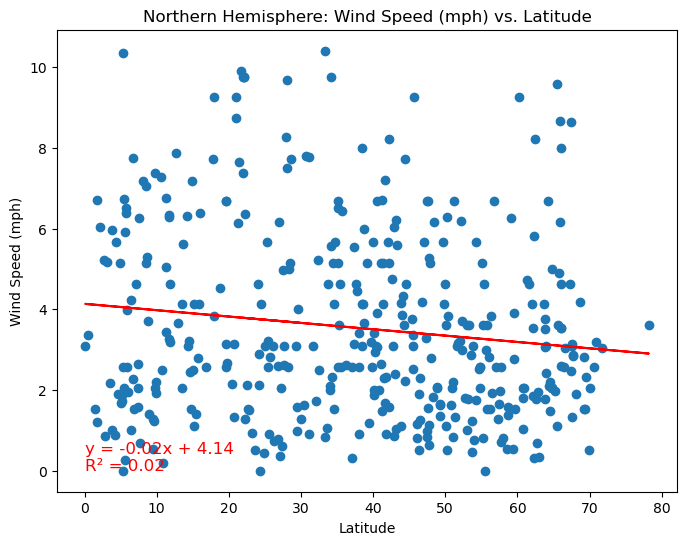

In [38]:
plt.figure(figsize=(8, 6))
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Northern', 'Wind Speed (mph)')

plt.savefig("../output_data/Northern_Hemi_Wind_Speed_Lat.png")

plt.show()


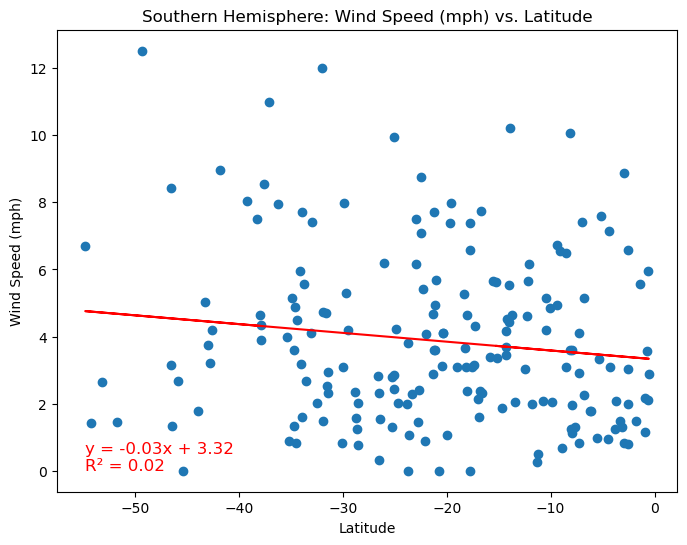

In [39]:
plt.figure(figsize=(8, 6))
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Southern', 'Wind Speed (mph)')

plt.savefig("../output_data/Southern_Hemi_Wind_Speed_Lat.png")

plt.show()


**Discussion about the linear relationship:** Wind Speed vs. Latitude:
The scatter plots and linear regression analysis show that wind speed doesn't follow a clear pattern with latitude. In both the Northern and Southern Hemispheres, wind speed varies widely at different latitudes. The weak linear relationship and low R-squared values indicate that latitude isn't a strong predictor of wind speed. Other factors like local geography, atmospheric conditions, and pressure systems have a more significant impact on wind patterns.